In [72]:
import imtools
import pickle
import glob
from numpy import *
import numpy as np
from scipy.cluster.vq import *
from PIL import Image
from pylab import *

In [73]:
# get list of images
imlist = glob.glob("image_sample_copy/animal_images/*.jpg")
#imlist = imtools.get_imlist('data/image_sample/animal_images')
imnbr = len(imlist)

In [74]:
# load model file
with open('sample_pca_modes_altered.pkl','rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)

In [75]:
immean

array([90.9, 93. , 85.2, ..., 64.2, 56.3, 45.1])

In [76]:
V

array([[-1.06659167e+02, -1.34997226e+02, -1.56679095e+02, ...,
        -8.49313805e+01, -6.26677510e+01, -1.02489605e+02],
       [ 1.05713334e+02,  7.48282446e+01,  8.71337648e+01, ...,
        -9.36359796e+01, -1.08257686e+02, -7.17329120e+01],
       [-7.38940910e+00,  2.20357487e+01,  3.39505749e+01, ...,
         2.43865170e+01,  3.24118358e+01,  3.07029852e+01],
       ...,
       [ 3.35412392e+01,  5.70438859e+01,  4.77682893e+01, ...,
         2.64952737e+01, -7.14338034e+00,  5.59676931e+00],
       [-1.97015922e+01, -2.86908052e+01, -2.74606259e+01, ...,
        -6.85705809e+00, -1.13794271e+01, -1.22200838e+01],
       [ 6.52467926e-14,  4.13002965e-14,  4.26431591e-14, ...,
         2.90984382e-14,  1.95399252e-14,  1.62092562e-14]])

In [77]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(im)).flatten()
for im in imlist],'f')

In [78]:
immatrix[0]

array([145., 147., 160., ...,  62.,  43.,  49.], dtype=float32)

In [79]:
# project on the 40 first PCs
immean = immean.flatten()
projected = array([dot(V[:40],immatrix[i]-immean) for i in range(imnbr)])

In [80]:
projected

array([[-7.20686867e+08,  1.30450387e+08,  6.16516796e+07,
        -8.95209798e+07,  1.26316438e+08, -4.51703189e+07,
         8.33446052e+07,  3.63558354e+07,  1.74737433e+08,
        -5.13191320e-08],
       [-7.14422003e+08,  3.88276027e+08,  6.67092322e+07,
        -2.43309498e+07, -2.58667136e+06,  1.56023484e+08,
        -4.66137285e+07,  1.34429354e+08, -8.56774684e+07,
         4.04264496e-08],
       [ 5.51043262e+08, -2.70765235e+08, -2.73089710e+07,
        -2.04434925e+08, -7.57461440e+07,  1.00449977e+07,
        -2.15416203e+08,  7.08369202e+07,  5.25683019e+07,
        -9.26701976e-08],
       [ 7.93307830e+08,  1.63089189e+08,  3.64517282e+08,
         1.62423824e+08,  1.43953866e+08, -1.76353380e+07,
        -8.68840708e+07, -9.25816964e+07, -4.19103237e+06,
        -1.96774411e-07],
       [ 1.36877656e+08,  4.50973444e+08, -3.17257487e+08,
        -3.83324923e+07, -1.03936326e+08, -1.04085941e+08,
        -3.89747295e+07, -1.24151608e+08, -6.49183521e+06,
         9.

In [91]:
# k-means
projected = whiten(projected)
centroids,distortion = kmeans(projected,4)
code,distance = vq(projected,centroids)

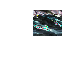

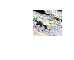

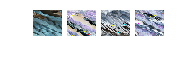

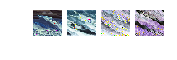

In [93]:
# plot clusters
for k in range(4):
    ind = where(code==k)[0]
    figure()
    gray()
    for i in range(minimum(len(ind),40)):
        subplot(4,10,i+1)
        imshow(immatrix[ind[i]].reshape((201,225,3)))
        axis('off')
show()